In [1]:
from utils import file_utils as fu
from smooth import method_factory as mf_smoothing
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

area = 'tw_oc'
m = 'smoothing'
dim = -1# not used here
smooth_method = mf_smoothing[m]()

train, val, test = fu.load_data(area)
I,L = train.shape

%matplotlib inline

2016-08-01 13:23:38,547 INFO --> Mem and popularity learnt from training data; searching alpha on validation set
2016-08-01 13:23:38,549 INFO --> Loading all data for area tw_oc


In [2]:
%%time
binary = (train>0)*1#I*L
count_1d = binary.sum(axis = 0)#1*L
count_2d = np.dot(binary.T,binary)#L*L
P_1d = count_1d/I # exists zeros
P_2d = count_2d/I
temp = P_2d/np.outer(P_1d,P_1d)
temp[ ~ np.isfinite( temp )]= 1 # zero / zero = zero
temp[temp==0]=1 # avoid log_zero
PPMI = np.log2(temp)
PPMI[PPMI<0] = 0

CPU times: user 3.89 s, sys: 5.53 s, total: 9.43 s
Wall time: 11 s


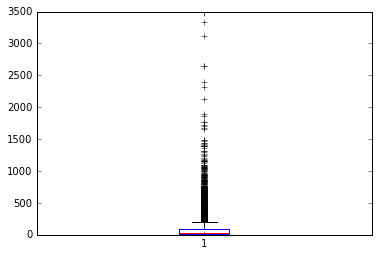

In [3]:
# NON_ZEROS = [np.count_nonzero(PPMI[i]) for i in range(L)]
# plt.boxplot(NON_ZEROS)
# plt.show()

In [4]:
k = 20
idx = np.array([np.asarray(PPMI[i].argsort().T).reshape(-1)[-k:][::-1] for i in range(L)])

In [10]:
%%time
# compute mutual information for these indices
# need to use dense matrix here
binary = (np.array(train.toarray())>0)*1#I*L
MI = np.zeros((L,L))
from sklearn import metrics
for u in range(L):
    for w in idx[u]:
        MI[u,w] = metrics.mutual_info_score(None, None, 
                contingency=np.histogram2d(binary[:,u], binary[:,w])[0])
from utils.helpers import normalize_mat_row, col_vector
MI = normalize_mat_row(MI)

CPU times: user 7min 43s, sys: 8.04 s, total: 7min 51s
Wall time: 7min 55s


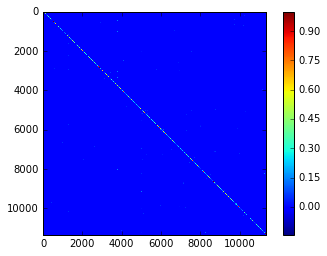

In [11]:
plt.imshow(MI, interpolation='nearest')
plt.colorbar()
plt.show()
# very sparse